## Combined Cycle Power Plant Data Set

Package imports

In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LinearRegression
import statsmodels.api as sm
from statsmodels.stats.outliers_influence import OLSInfluence
from sklearn.preprocessing import StandardScaler, MinMaxScaler
from sklearn.preprocessing import PolynomialFeatures
from sklearn.metrics import mean_squared_error
from sklearn.neighbors import KNeighborsRegressor,KNeighborsClassifier
from sklearn.metrics.pairwise import pairwise_distances
import warnings
warnings.filterwarnings("ignore")

Get the Cycle Power Plant Data Set

In [2]:
cppdf = pd.read_excel('./data/CCPP/Folds5x2_pp.xlsx')
cppdf.head()

,AT,V,AP,RH,PE
0,14.96,41.76,1024.07,73.17,463.26
1,25.18,62.96,1020.04,59.08,444.37
2,5.11,39.40,1012.16,92.14,488.56
3,20.86,57.32,1010.24,76.64,446.48
4,10.82,37.50,1009.23,96.62,473.90


In [3]:
cppdf.isnull().sum()

AT    0
V     0
AP    0
RH    0
PE    0
dtype: int64

### EDA

In [4]:
shape_arr = cppdf.shape
print(f'No. of Rows : {shape_arr[0]}')
print(f'No. of Columns : {shape_arr[1]}')

No. of Rows : 9568
No. of Columns : 5


In the above mentioned dataset, we have <b>9568 rows and 5 columns</b>.
<br>
Columns represent the features of the power plant data which are as follows : <b>AMBIENT TEMPRATURE, VACCUM, AMBIENT PRESSURE, RELATIVE HUMIDITY, ENERGY OUTPUT per hour</b>.
<br>
Rows represent the <b>data</b> that has been collected from the power plant, rows basically have the <b>values of the thermodynamic variables</b> that can be used to calculate the final feature (PE).

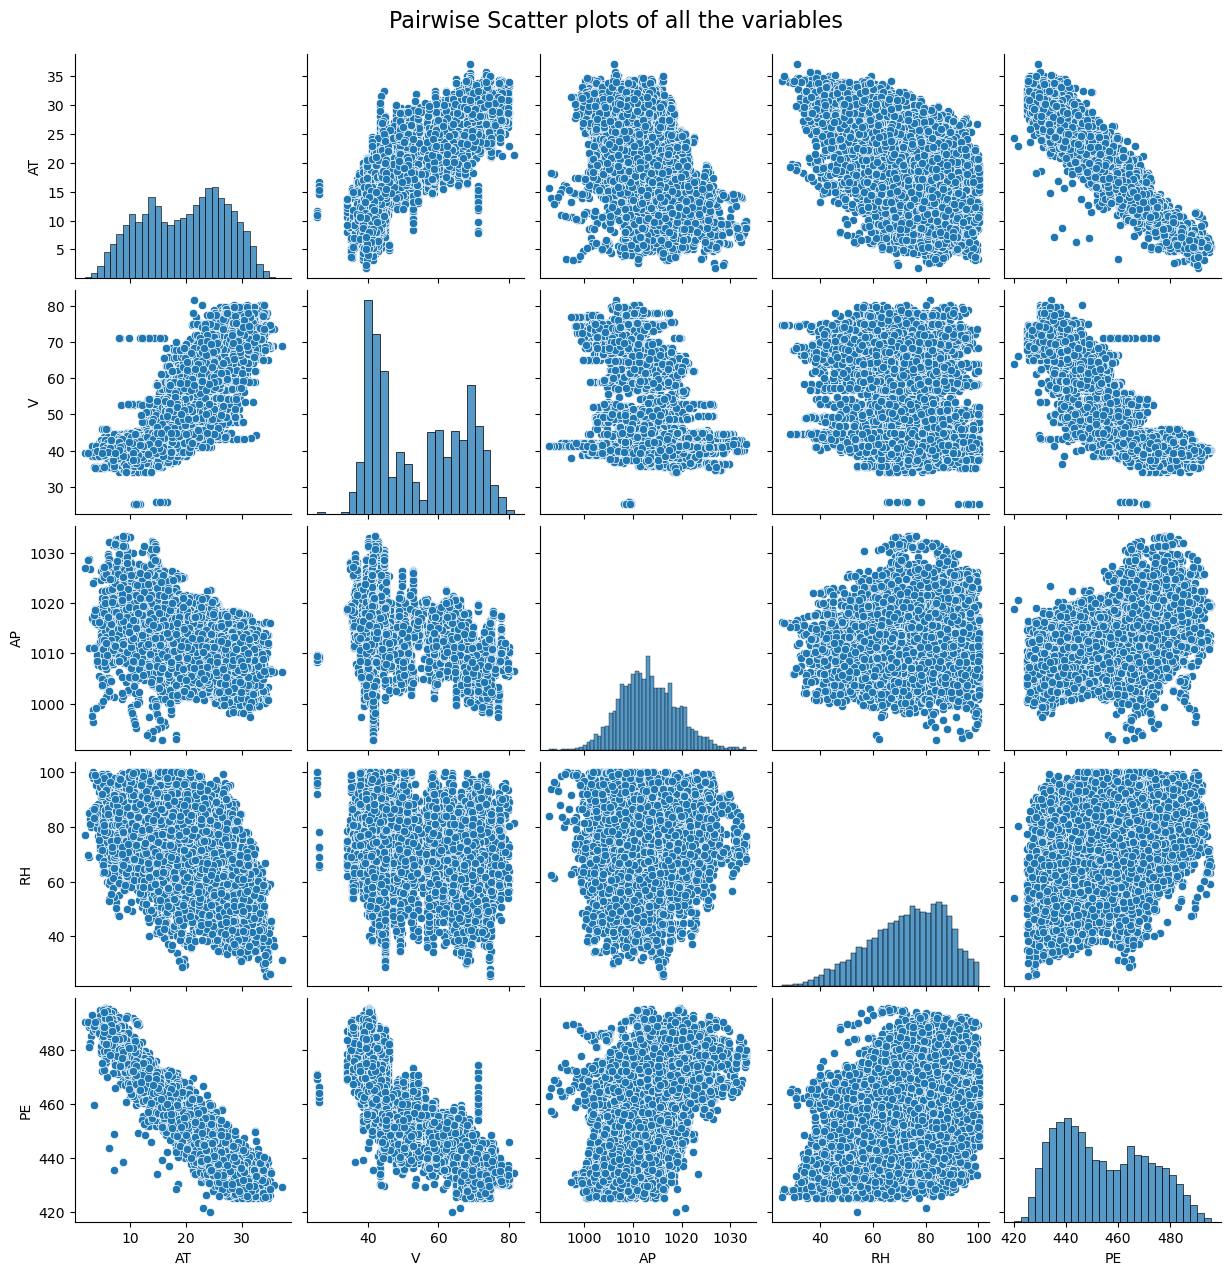

In [5]:
sns.pairplot(cppdf)
plt.suptitle('Pairwise Scatter plots of all the variables', y=1.02, fontsize = 16)
plt.show()

<b>Inferences from the Plots</b><br>
i. Ambient Temprature (AT) might be positively correlated to Ambient Vaccum (V), directly proportional, it has cases of outliers.<br>
ii. Ambient Temprature is a significant feature in determination of dependent variable that is Energy Output and as per the plot it is inversely proportional to it, so AT has negative correlation with PE. As the Ambient Temprature value increases the value of Output Energy decreases. It has a few scenarios of outliers which needs to be taken into consideration while modelling <br>
iii. Similar to AT, V is also inversely proportional to the predicting varibale, thus forming a negative correlation between the two, but in comparison of AT and V, V has a weaker correlation with PE<br>
iv. Rest all features that is Ambient Pressure (AP) and Relative Humidity (RH) in relation to PE are just randomly scattered thus forming weak correlation, might need to check the correlation map for precise values.

In [6]:
math_data = cppdf.describe()
final_math = math_data.loc[['mean','50%','min','max','25%','75%']]
iqrs = math_data.loc['75%']-math_data.loc['25%']
final_math.loc['IQR'] = iqrs
final_math.loc['Lower Bound'] = math_data.loc['25%'] - 1.5*(iqrs)
final_math.loc['Upper Bound'] = math_data.loc['75%'] + 1.5*(iqrs)
final_math.loc['Range'] = math_data.loc['max'] - math_data.loc['min']
final_math.rename({'mean':'Mean','50%':'Median','min':'Minimum Value','max':'Maximum Value','25%':'First Quartile (Q1)', '75%':'Third Quartile (Q3)'}, inplace=True)
final_math

,AT,V,AP,RH,PE
Mean,19.651231,54.305804,1013.259078,73.308978,454.365009
Median,20.345000,52.080000,1012.940000,74.975000,451.550000
Minimum Value,1.810000,25.360000,992.890000,25.560000,420.260000
Maximum Value,37.110000,81.560000,1033.300000,100.160000,495.760000
First Quartile (Q1),13.510000,41.740000,1009.100000,63.327500,439.750000
Third Quartile (Q3),25.720000,66.540000,1017.260000,84.830000,468.430000
IQR,12.210000,24.800000,8.160000,21.502500,28.680000
Lower Bound,-4.805000,4.540000,996.860000,31.073750,396.730000
Upper Bound,44.035000,103.740000,1029.500000,117.083750,511.450000
Range,35.300000,56.200000,40.410000,74.600000,75.500000


### Simple Linear Regression



                            OLS Regression Results                            
Dep. Variable:                     PE   R-squared:                       0.899
Model:                            OLS   Adj. R-squared:                  0.899
Method:                 Least Squares   F-statistic:                 8.510e+04
Date:                Mon, 02 Jun 2025   Prob (F-statistic):               0.00
Time:                        19:11:19   Log-Likelihood:                -29756.
No. Observations:                9568   AIC:                         5.952e+04
Df Residuals:                    9566   BIC:                         5.953e+04
Df Model:                           1                                         
Covariance Type:            nonrobust                                         
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
const        497.0341      0.156   3177.280      0

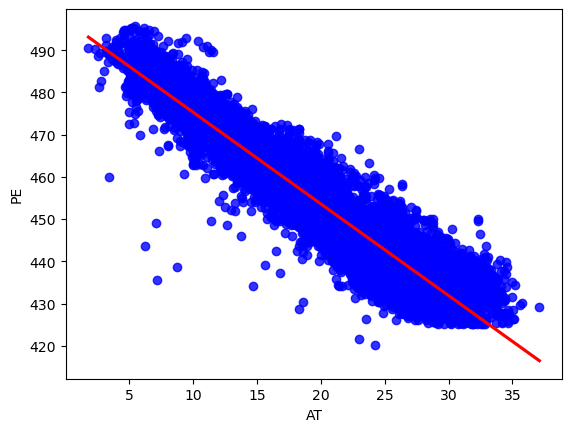



                            OLS Regression Results                            
Dep. Variable:                     PE   R-squared:                       0.757
Model:                            OLS   Adj. R-squared:                  0.756
Method:                 Least Squares   F-statistic:                 2.972e+04
Date:                Mon, 02 Jun 2025   Prob (F-statistic):               0.00
Time:                        19:11:19   Log-Likelihood:                -33963.
No. Observations:                9568   AIC:                         6.793e+04
Df Residuals:                    9566   BIC:                         6.794e+04
Df Model:                           1                                         
Covariance Type:            nonrobust                                         
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
const        517.8015      0.378   1370.218      0

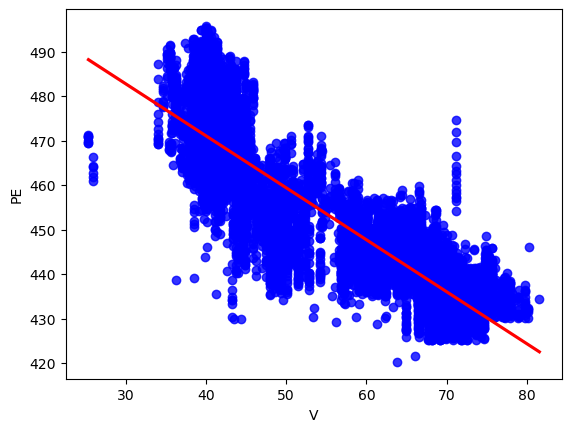



                            OLS Regression Results                            
Dep. Variable:                     PE   R-squared:                       0.269
Model:                            OLS   Adj. R-squared:                  0.269
Method:                 Least Squares   F-statistic:                     3516.
Date:                Mon, 02 Jun 2025   Prob (F-statistic):               0.00
Time:                        19:11:19   Log-Likelihood:                -39224.
No. Observations:                9568   AIC:                         7.845e+04
Df Residuals:                    9566   BIC:                         7.847e+04
Df Model:                           1                                         
Covariance Type:            nonrobust                                         
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
const      -1055.2610     25.459    -41.449      0

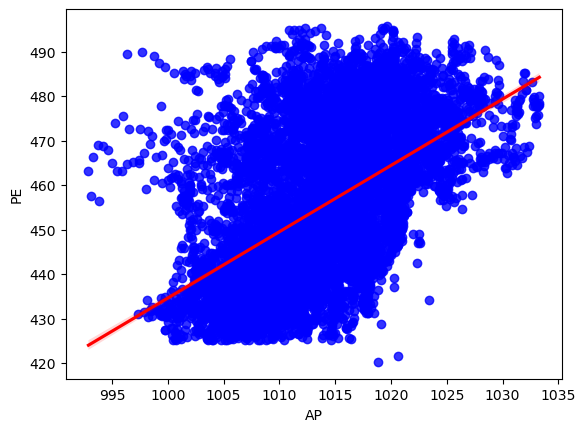



                            OLS Regression Results                            
Dep. Variable:                     PE   R-squared:                       0.152
Model:                            OLS   Adj. R-squared:                  0.152
Method:                 Least Squares   F-statistic:                     1714.
Date:                Mon, 02 Jun 2025   Prob (F-statistic):               0.00
Time:                        19:11:20   Log-Likelihood:                -39933.
No. Observations:                9568   AIC:                         7.987e+04
Df Residuals:                    9566   BIC:                         7.988e+04
Df Model:                           1                                         
Covariance Type:            nonrobust                                         
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
const        420.9618      0.823    511.676      0

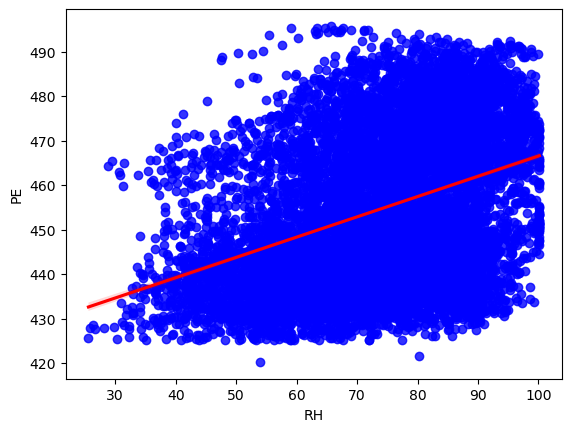

In [7]:
simp_coef = []
multi_coef = []

feature_columns = list(cppdf.columns)[:-1]
target_column = list(cppdf.columns)[-1]
for i in feature_columns:
    X = cppdf[[i]]
    y = cppdf[target_column]
    X = sm.add_constant(cppdf[i])
    model = sm.OLS(y,X).fit()
    print("\n")
    print(model.summary())
    print(f"\nFor independent variable - {i} below is the plot graph")
    sns.regplot(x=cppdf[i], y=y, color='blue', line_kws=dict(color='red'))
    plt.show()
    simp_coef.append(model.params[1])

From the above summary and plots, it can be inferred that all independent variables i.e AT, V, AP, and RH are stastically significant for determining PE.<br>
Since all the predictors in relation to target variable are having p-values 0.000 i.e less than 0.05<br>
<b>Significant Predictors : AT, V, AP, RH</b>

                            OLS Regression Results                            
Dep. Variable:                     PE   R-squared:                       0.920
Model:                            OLS   Adj. R-squared:                  0.920
Method:                 Least Squares   F-statistic:                 1.047e+05
Date:                Mon, 02 Jun 2025   Prob (F-statistic):               0.00
Time:                        19:11:20   Log-Likelihood:                -27302.
No. Observations:                9152   AIC:                         5.461e+04
Df Residuals:                    9150   BIC:                         5.462e+04
Df Model:                           1                                         
Covariance Type:            nonrobust                                         
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
const        498.0196      0.143   3471.047      0.0

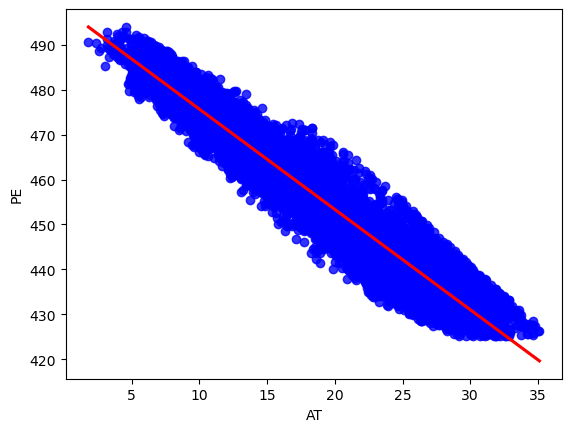

                            OLS Regression Results                            
Dep. Variable:                     PE   R-squared:                       0.798
Model:                            OLS   Adj. R-squared:                  0.798
Method:                 Least Squares   F-statistic:                 3.612e+04
Date:                Mon, 02 Jun 2025   Prob (F-statistic):               0.00
Time:                        19:11:20   Log-Likelihood:                -31275.
No. Observations:                9145   AIC:                         6.255e+04
Df Residuals:                    9143   BIC:                         6.257e+04
Df Model:                           1                                         
Covariance Type:            nonrobust                                         
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
const        517.4793      0.344   1502.660      0.0

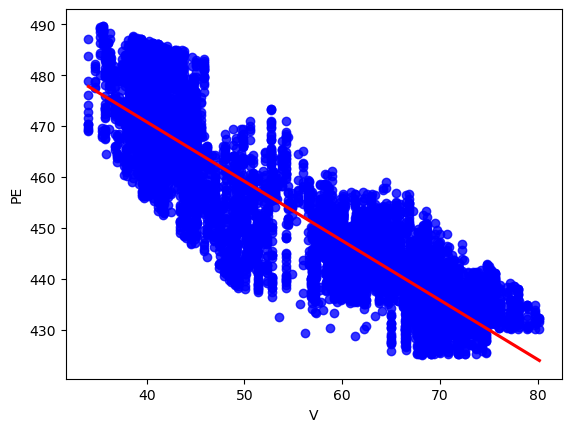

                            OLS Regression Results                            
Dep. Variable:                     PE   R-squared:                       0.361
Model:                            OLS   Adj. R-squared:                  0.361
Method:                 Least Squares   F-statistic:                     5234.
Date:                Mon, 02 Jun 2025   Prob (F-statistic):               0.00
Time:                        19:11:21   Log-Likelihood:                -37219.
No. Observations:                9268   AIC:                         7.444e+04
Df Residuals:                    9266   BIC:                         7.446e+04
Df Model:                           1                                         
Covariance Type:            nonrobust                                         
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
const      -1334.8378     24.723    -53.992      0.0

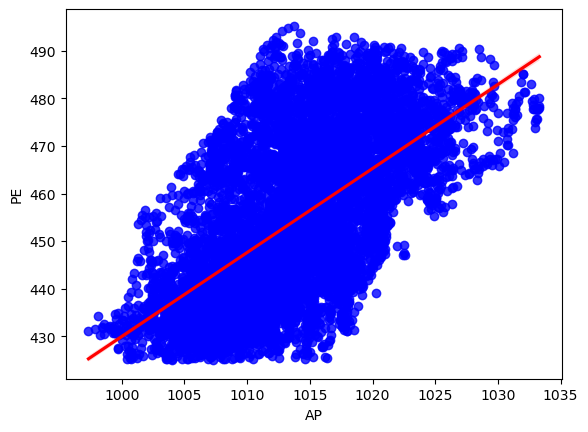

                            OLS Regression Results                            
Dep. Variable:                     PE   R-squared:                       0.196
Model:                            OLS   Adj. R-squared:                  0.196
Method:                 Least Squares   F-statistic:                     2277.
Date:                Mon, 02 Jun 2025   Prob (F-statistic):               0.00
Time:                        19:11:21   Log-Likelihood:                -38536.
No. Observations:                9319   AIC:                         7.708e+04
Df Residuals:                    9317   BIC:                         7.709e+04
Df Model:                           1                                         
Covariance Type:            nonrobust                                         
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
const        415.5983      0.823    504.681      0.0

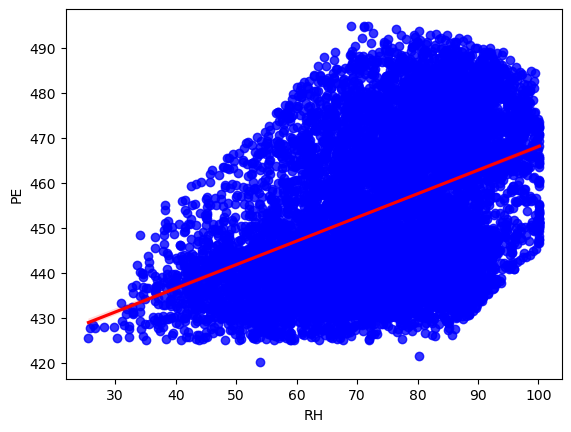

In [8]:
feature_columns = list(cppdf.columns)[:-1]
target_column = list(cppdf.columns)[-1]

for i in feature_columns:
    X = cppdf[[i]]
    y = cppdf[target_column]
    X = sm.add_constant(cppdf[i])
    model = sm.OLS(y, X).fit()
    influ = OLSInfluence(model)
    cooks_dist = influ.cooks_distance[0]
    outlier_cond = 4 / len(cppdf)
    outliers = np.where(cooks_dist>outlier_cond)[0]
    cppdf_outlier_df = cppdf.drop(index=outliers).reset_index(drop=True)

    X_new = cppdf_outlier_df[[i]]
    y_new = cppdf_outlier_df[target_column]
    X_new = sm.add_constant(X_new)
    model_new = sm.OLS(y_new, X_new).fit()
    print(model_new.summary())
    sns.regplot(x = cppdf_outlier_df[i], y = y_new, color='blue', line_kws=dict(color='red'))
    plt.show()
    
    

<b>For AT vs PE</b><br>
After removing the outliers R-Squared value increased from 0.899 to 0.920 which means the outlier were causing issue in fitting the model.<br>
<b>For V vs PE</b><br>
After removing the outliers R-Squared value increased from 0.757 to 0.798 which means the outlier were causing issue in fitting the model.<br>
<b>For AP vs PE</b><br>
After removing the outliers R-Squared value increased from 0.269 to 0.361 which means the outlier were causing issue in fitting the model.<br>
<b>For RH vs PE</b><br>
After removing the outliers R-Squared value increased from 0.152 to 0.196 which means the outlier were causing issue in fitting the model.<br>

### Multiple Linear Regression

In [9]:
X = cppdf.iloc[:,:-1]
y = cppdf.iloc[:,-1]
X = sm.add_constant(X)
model = sm.OLS(y,X).fit()
print(model.summary())
multi_coef.append(model.params[1])
multi_coef.append(model.params[2])
multi_coef.append(model.params[3])
multi_coef.append(model.params[4])

                            OLS Regression Results                            
Dep. Variable:                     PE   R-squared:                       0.929
Model:                            OLS   Adj. R-squared:                  0.929
Method:                 Least Squares   F-statistic:                 3.114e+04
Date:                Mon, 02 Jun 2025   Prob (F-statistic):               0.00
Time:                        19:11:22   Log-Likelihood:                -28088.
No. Observations:                9568   AIC:                         5.619e+04
Df Residuals:                    9563   BIC:                         5.622e+04
Df Model:                           4                                         
Covariance Type:            nonrobust                                         
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
const        454.6093      9.749     46.634      0.0

Since all predictors are having p-value < 0.05 we can infer that all the predictors are statistically significant for PE<br>
Hence for all predictors we can reject the Null Hypothesis.<br>
Model fits well for the considered features as the R-Squared value is also very good i.e 0.929<br>
AT has the highest influence on predicting the value of p i.e. -1.19775 which means as the tempreature decreses the power output increases.

### Comparision of coeeficients of Simple VS Multiple Linear Regression

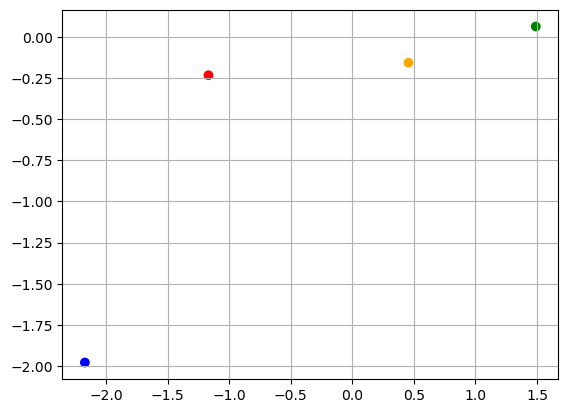

In [10]:
x = simp_coef
y = multi_coef
plt.scatter(x,y, c=['blue','red','green','orange'])
plt.grid(True)
plt.show()

### Non-linear Association

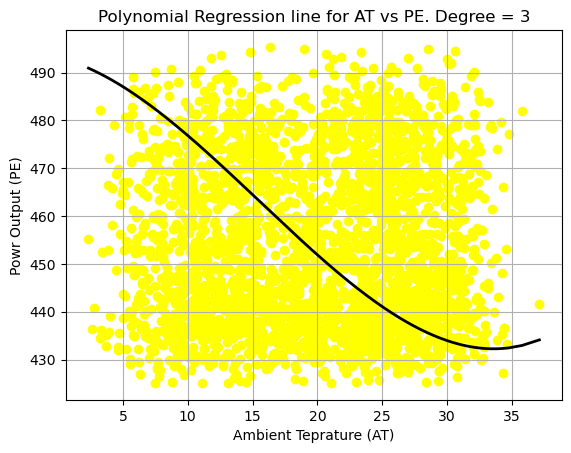

                            OLS Regression Results                            
Dep. Variable:                     PE   R-squared:                       0.912
Model:                            OLS   Adj. R-squared:                  0.912
Method:                 Least Squares   F-statistic:                 3.299e+04
Date:                Mon, 02 Jun 2025   Prob (F-statistic):               0.00
Time:                        19:11:22   Log-Likelihood:                -29101.
No. Observations:                9568   AIC:                         5.821e+04
Df Residuals:                    9564   BIC:                         5.824e+04
Df Model:                           3                                         
Covariance Type:            nonrobust                                         
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
const        492.7281      0.673    732.248      0.0

In [11]:
#for AT vs PE, considering Polynomial function with the degree = 3
X = cppdf.loc[:,['AT']]
y = cppdf.iloc[:,-1]
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3, random_state=42)
poly_feature = PolynomialFeatures(degree=3, include_bias=False)
X_poly_train = poly_feature.fit_transform(X_train)
X_poly_test = poly_feature.transform(X_test)
lin_reg = LinearRegression()
lin_reg.fit(X_poly_train,y_train)
y_pred = lin_reg.predict(X_poly_test)

#sorting before plotting, did not know about this, used AI to understand this concept. Prompt :- How to smooothen the curve of polynomilal regression
sorted_ind = np.argsort(X_test.values.ravel())
X_test = X_test.values.ravel()[sorted_ind]
y_pred = y_pred[sorted_ind]

plt.scatter(X_test,y_test, color='yellow')
plt.plot(X_test,y_pred, color='black', linewidth=2)
plt.xlabel('Ambient Teprature (AT)')
plt.ylabel('Powr Output (PE)')
plt.title('Polynomial Regression line for AT vs PE. Degree = 3')
plt.grid()
plt.show()

X_poly = poly_feature.fit_transform(X)
X_poly = sm.add_constant(X_poly)
model = sm.OLS(y,X_poly).fit()
print(model.summary())

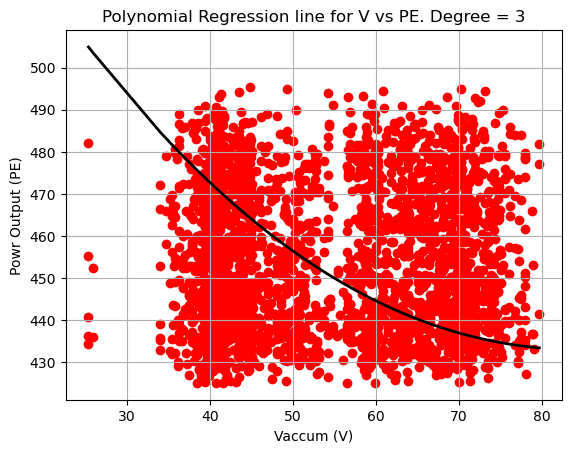

                            OLS Regression Results                            
Dep. Variable:                     PE   R-squared:                       0.775
Model:                            OLS   Adj. R-squared:                  0.775
Method:                 Least Squares   F-statistic:                 1.098e+04
Date:                Mon, 02 Jun 2025   Prob (F-statistic):               0.00
Time:                        19:11:22   Log-Likelihood:                -33585.
No. Observations:                9568   AIC:                         6.718e+04
Df Residuals:                    9564   BIC:                         6.721e+04
Df Model:                           3                                         
Covariance Type:            nonrobust                                         
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
const        554.1468      9.151     60.557      0.0

In [12]:
#for V vs PE, considering Polynomial function with the degree = 3
X = cppdf.loc[:,['V']]
y = cppdf.iloc[:,-1]
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3, random_state=42)
poly_feature = PolynomialFeatures(degree=3, include_bias=False)
X_poly_train = poly_feature.fit_transform(X_train)
X_poly_test = poly_feature.transform(X_test)
lin_reg = LinearRegression()
lin_reg.fit(X_poly_train,y_train)
y_pred = lin_reg.predict(X_poly_test)

#sorting before plotting, did not know about this, used AI to understand this concept. Prompt :- How to smooothen the curve of polynomilal regression
sorted_ind = np.argsort(X_test.values.ravel())
X_test = X_test.values.ravel()[sorted_ind]
y_pred = y_pred[sorted_ind]

plt.scatter(X_test,y_test, color='red')
plt.plot(X_test,y_pred, color='black', linewidth=2)
plt.xlabel('Vaccum (V)')
plt.ylabel('Powr Output (PE)')
plt.title('Polynomial Regression line for V vs PE. Degree = 3')
plt.grid()
plt.show()

X_poly = poly_feature.fit_transform(X)
X_poly = sm.add_constant(X_poly)
model = sm.OLS(y,X_poly).fit()
print(model.summary())

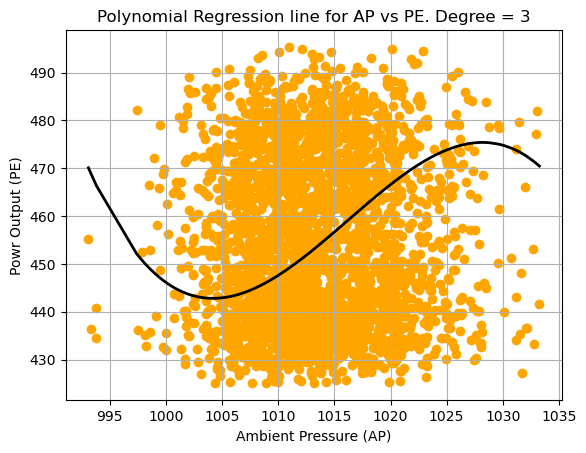

                            OLS Regression Results                            
Dep. Variable:                     PE   R-squared:                       0.275
Model:                            OLS   Adj. R-squared:                  0.275
Method:                 Least Squares   F-statistic:                     1813.
Date:                Mon, 02 Jun 2025   Prob (F-statistic):               0.00
Time:                        19:11:22   Log-Likelihood:                -39184.
No. Observations:                9568   AIC:                         7.837e+04
Df Residuals:                    9565   BIC:                         7.840e+04
Df Model:                           2                                         
Covariance Type:            nonrobust                                         
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
const          0.0747      0.009      8.415      0.0

In [13]:
#for AP vs PE, considering Polynomial function with the degree = 3
X = cppdf.loc[:,['AP']]
y = cppdf.iloc[:,-1]
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3, random_state=42)
poly_feature = PolynomialFeatures(degree=3, include_bias=False)
X_poly_train = poly_feature.fit_transform(X_train)
X_poly_test = poly_feature.transform(X_test)
lin_reg = LinearRegression()
lin_reg.fit(X_poly_train,y_train)
y_pred = lin_reg.predict(X_poly_test)

#sorting before plotting, did not know about this, used AI to understand this concept. Prompt :- How to smooothen the curve of polynomilal regression
sorted_ind = np.argsort(X_test.values.ravel())
X_test = X_test.values.ravel()[sorted_ind]
y_pred = y_pred[sorted_ind]

plt.scatter(X_test,y_test, color='orange')
plt.plot(X_test,y_pred, color='black', linewidth=2)
plt.xlabel('Ambient Pressure (AP)')
plt.ylabel('Powr Output (PE)')
plt.title('Polynomial Regression line for AP vs PE. Degree = 3')
plt.grid()
plt.show()

X_poly = poly_feature.fit_transform(X)
X_poly = sm.add_constant(X_poly)
model = sm.OLS(y,X_poly).fit()
print(model.summary())

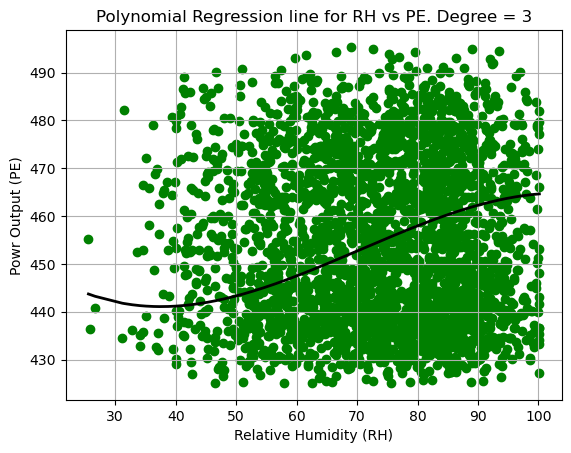

                            OLS Regression Results                            
Dep. Variable:                     PE   R-squared:                       0.154
Model:                            OLS   Adj. R-squared:                  0.153
Method:                 Least Squares   F-statistic:                     579.2
Date:                Mon, 02 Jun 2025   Prob (F-statistic):               0.00
Time:                        19:11:22   Log-Likelihood:                -39923.
No. Observations:                9568   AIC:                         7.985e+04
Df Residuals:                    9564   BIC:                         7.988e+04
Df Model:                           3                                         
Covariance Type:            nonrobust                                         
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
const        468.4135     10.545     44.422      0.0

In [14]:
#for RH vs PE, considering Polynomial function with the degree = 3
X = cppdf.loc[:,['RH']]
y = cppdf.iloc[:,-1]
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3, random_state=42)
poly_feature = PolynomialFeatures(degree=3, include_bias=False)
X_poly_train = poly_feature.fit_transform(X_train)
X_poly_test = poly_feature.transform(X_test)
lin_reg = LinearRegression()
lin_reg.fit(X_poly_train,y_train)
y_pred = lin_reg.predict(X_poly_test)

#sorting before plotting, did not know about this, used AI to understand this concept. Prompt :- How to smooothen the curve of polynomilal regression
sorted_ind = np.argsort(X_test.values.ravel())
X_test = X_test.values.ravel()[sorted_ind]
y_pred = y_pred[sorted_ind]

plt.scatter(X_test,y_test, color='green')
plt.plot(X_test,y_pred, color='black', linewidth=2)
plt.xlabel('Relative Humidity (RH)')
plt.ylabel('Powr Output (PE)')
plt.title('Polynomial Regression line for RH vs PE. Degree = 3')
plt.grid()
plt.show()

X_poly = poly_feature.fit_transform(X)
X_poly = sm.add_constant(X_poly)
model = sm.OLS(y,X_poly).fit()
print(model.summary())

<b>Inference from above question :-</b><br>
1. For AT vs PE - The polynomial varibales have p-value very less i.e. 0.000 and hence are significant for contribution towards predicting PE. Also the R^2 improved with a very small rate.<br>
2. For V vs PE - The p-value of the x^2 variable is greater than 0.05 which means it does not add significance to the model. That means V*2 does not add significance for predicting PE<br>
3. For AP vs PE - The polynomial varibales have p-value very less i.e. 0.000 and hence are significant for contribution towards predicting PE. Also the R^2 improved with a very small rate.<br>
4. For RH vs PE - The polynomial varibales have p-value very less i.e. 0.000 and hence are significant for contribution towards predicting PE. Also the R^2 improved with a very small rate.<br>

### Interaction of Predictors

In [15]:
#building the extra variables in the dataframe
cppdf_int = cppdf.copy()
cppdf_int['AT X V'] = cppdf['AT'] * cppdf['V']
cppdf_int['AT X AP'] = cppdf['AT'] * cppdf['AP']
cppdf_int['AT X RH'] = cppdf['AT'] * cppdf['RH']
cppdf_int['V X AP'] = cppdf['V'] * cppdf['AP']
cppdf_int['V X RH'] = cppdf['V'] * cppdf['RH']
cppdf_int['AP X RH'] = cppdf['AP'] * cppdf['RH']
cppdf_int.head()

,AT,V,AP,RH,PE,AT X V,AT X AP,AT X RH,V X AP,V X RH,AP X RH
0,14.96,41.76,1024.07,73.17,463.26,624.7296,15320.0872,1094.6232,42765.1632,3055.5792,74931.2019
1,25.18,62.96,1020.04,59.08,444.37,1585.3328,25684.6072,1487.6344,64221.7184,3719.6768,60263.9632
2,5.11,39.40,1012.16,92.14,488.56,201.3340,5172.1376,470.8354,39879.1040,3630.3160,93260.4224
3,20.86,57.32,1010.24,76.64,446.48,1195.6952,21073.6064,1598.7104,57906.9568,4393.0048,77424.7936
4,10.82,37.50,1009.23,96.62,473.90,405.7500,10919.8686,1045.4284,37846.1250,3623.2500,97511.8026


In [16]:
X = cppdf_int.drop('PE', axis=1)
y = cppdf_int.loc[:,'PE']
X = sm.add_constant(X)
model = sm.OLS(y,X).fit()
print(model.summary())

                            OLS Regression Results                            
Dep. Variable:                     PE   R-squared:                       0.936
Model:                            OLS   Adj. R-squared:                  0.936
Method:                 Least Squares   F-statistic:                 1.405e+04
Date:                Mon, 02 Jun 2025   Prob (F-statistic):               0.00
Time:                        19:11:22   Log-Likelihood:                -27548.
No. Observations:                9568   AIC:                         5.512e+04
Df Residuals:                    9557   BIC:                         5.520e+04
Df Model:                          10                                         
Covariance Type:            nonrobust                                         
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
const        685.7825     78.640      8.721      0.0

Inference from above question :-<br>
1. For AT x AP vs PE - The p-value is higher than 0.05<br>
2. For V x RH vs PE - The p-value is higher than 0.05<br>
Therefore, following interactions do not add significance to the model:-<br>
<b>AT x AP</b><br>
<b>V x RH</b><br>
3. For AT - The p-value is higher than 0.05 but it can't be rejected/removed since it is a part of AT X V interaction term and is sginificant in predicting PE

In [17]:
mse_dict = {}
X = cppdf.iloc[:,:-1]
y = cppdf.iloc[:,-1]
X_train, X_test, y_train, y_test = train_test_split(X,y,test_size=0.3,random_state=42)

# Model 1 - Regression Equation for all predictors
lin_reg1 = LinearRegression()
lin_reg1.fit(X_train,y_train)
y_pred1_train = lin_reg1.predict(X_train)
y_pred1_test = lin_reg1.predict(X_test)
mse1_test = mean_squared_error(y_true=y_test, y_pred=y_pred1_test)
mse1_train = mean_squared_error(y_true = y_train, y_pred = y_pred1_train)
mse_dict['Model 1 Test MSE'] = mse1_test
mse_dict['Model 1 Train MSE'] = mse1_train
print(mse_dict)

{'Model 1 Test MSE': 21.23985693822551, 'Model 1 Train MSE': 20.580839725738695}


In [18]:
# Model 2 - Regression Function for all possible interactions and quadralities
cppdf_2 = cppdf.copy()
cppdf_2['AT*AT'] = cppdf_2['AT'] * cppdf_2['AT']
cppdf_2['V*V'] = cppdf_2['V'] * cppdf_2['V']
cppdf_2['AP*AP'] = cppdf_2['AP'] * cppdf_2['AP']
cppdf_2['RH*RH'] = cppdf_2['RH'] * cppdf_2['RH']
cppdf_2['AT X V'] = cppdf_2['AT'] * cppdf_2['V']
cppdf_2['AT X AP'] = cppdf_2['AT'] * cppdf_2['AP']
cppdf_2['AT X RH'] = cppdf_2['AT'] * cppdf_2['RH']
cppdf_2['V X AP'] = cppdf_2['V'] * cppdf_2['AP']
cppdf_2['V X RH'] = cppdf_2['V'] * cppdf_2['RH']
cppdf_2['AP X RH'] = cppdf_2['AP'] * cppdf_2['RH']

X = cppdf_2.drop('PE', axis = 1)
y = cppdf_2.loc[:,'PE']

X_train, X_test, y_train, y_test = train_test_split(X,y,test_size=0.3,random_state=42)
X_train_new = sm.add_constant(X_train)
model = sm.OLS(y_train,X_train_new).fit()
print(model.summary())

                            OLS Regression Results                            
Dep. Variable:                     PE   R-squared:                       0.938
Model:                            OLS   Adj. R-squared:                  0.938
Method:                 Least Squares   F-statistic:                     7272.
Date:                Mon, 02 Jun 2025   Prob (F-statistic):               0.00
Time:                        19:11:44   Log-Likelihood:                -19160.
No. Observations:                6697   AIC:                         3.835e+04
Df Residuals:                    6682   BIC:                         3.845e+04
Df Model:                          14                                         
Covariance Type:            nonrobust                                         
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
const      -7664.9809   1429.568     -5.362      0.0

<b>Note :- </b>So as per the above p-values of all the variables, we will first remove the max p-value variable i.e. V X RH

In [20]:
X = cppdf_2.drop(['V X RH','PE','V*V'], axis = 1)
y = cppdf_2.loc[:,'PE']
X_train, X_test, y_train, y_test = train_test_split(X,y,test_size=0.3,random_state=42)
X_train_new = sm.add_constant(X_train)
model = sm.OLS(y_train,X_train_new).fit()
print(model.summary())

                            OLS Regression Results                            
Dep. Variable:                     PE   R-squared:                       0.938
Model:                            OLS   Adj. R-squared:                  0.938
Method:                 Least Squares   F-statistic:                     8486.
Date:                Mon, 02 Jun 2025   Prob (F-statistic):               0.00
Time:                        19:12:47   Log-Likelihood:                -19160.
No. Observations:                6697   AIC:                         3.835e+04
Df Residuals:                    6684   BIC:                         3.844e+04
Df Model:                          12                                         
Covariance Type:            nonrobust                                         
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
const      -7693.6035   1427.075     -5.391      0.0

<b>Note :- </b>So as per the above p-values of all the variables, we will now remove the max p-value variable i.e. V X AP

In [21]:
lin_reg2 = LinearRegression()
lin_reg2.fit(X_train,y_train)
y_pred2_train = lin_reg2.predict(X_train)
y_pred2_test = lin_reg2.predict(X_test)
mse2_test = mean_squared_error(y_true=y_test, y_pred=y_pred2_test)
mse2_train = mean_squared_error(y_true = y_train, y_pred = y_pred2_train)
mse_dict['Model 2 Test MSE'] = mse2_test
mse_dict['Model 2 Train MSE'] = mse2_train
print(mse_dict)

{'Model 1 Test MSE': 21.23985693822551, 'Model 1 Train MSE': 20.580839725738695, 'Model 2 Test MSE': 18.65212626071441, 'Model 2 Train MSE': 17.888579596898825}


### KNN Algorithm

For KNN Regression the least error of 15.726819842563568 is obtained at k = 5


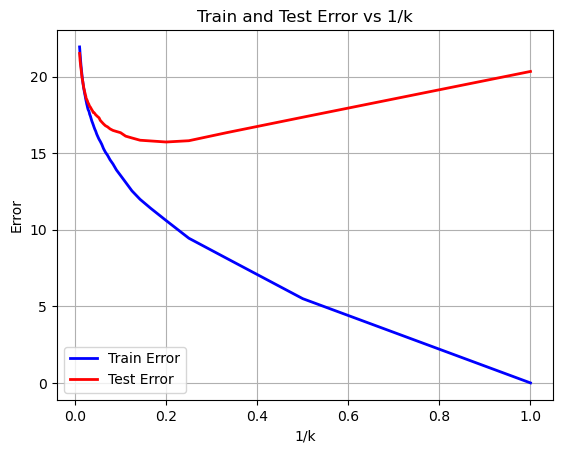

In [22]:
# working on unnormalized data
X = cppdf.iloc[:,:-1]
y = cppdf.iloc[:,-1]
max_error = 10000000
train_err = []
test_err = []
X_train, X_test, y_train, y_test = train_test_split(X,y,test_size=0.3,random_state=42)
k_list = list(range(1,101,1))
k_inv_list = list(map(lambda x : 1/x, k_list))
for k in k_list:
    knn_reg = KNeighborsRegressor(n_neighbors=k)
    knn_reg.fit(X_train,y_train)
    #Training error calculation
    y_train_pred = knn_reg.predict(X_train)
    mse_train = mean_squared_error(y_true=y_train, y_pred=y_train_pred)
    train_err.append(mse_train)
    #Testing error calculation
    y_test_pred = knn_reg.predict(X_test)
    mse_test = mean_squared_error(y_true=y_test, y_pred = y_test_pred)
    test_err.append(mse_test)
    if mse_test<max_error:
        max_error = mse_test
        k_best = k

print(f"For KNN Regression the least error of {max_error} is obtained at k = {k_best}")
plt.plot(k_inv_list,train_err, color='blue', linewidth=2, label='Train Error')
plt.plot(k_inv_list,test_err, color='red', linewidth=2, label='Test Error')
plt.xlabel('1/k')
plt.ylabel('Error')
plt.title('Train and Test Error vs 1/k')
plt.legend()
plt.grid(True)
plt.show()

For KNN Regression the least error of 14.348653474399166 is obtained at k = 4


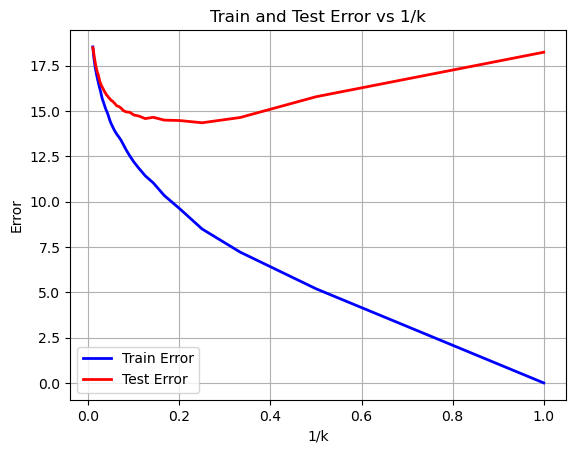

In [23]:
# working on normalized data
nor_scale = MinMaxScaler()
X_nor = pd.DataFrame(nor_scale.fit_transform(X), columns=X.columns)
max_error = 10000000
train_err = []
test_err = []
X_train, X_test, y_train, y_test = train_test_split(X_nor,y,test_size=0.3,random_state=42)
k_list = list(range(1,101,1))
k_inv_list = list(map(lambda x : 1/x, k_list))
for k in k_list:
    knn_reg = KNeighborsRegressor(n_neighbors=k)
    knn_reg.fit(X_train,y_train)
    #Training error calculation
    y_train_pred = knn_reg.predict(X_train)
    mse_train = mean_squared_error(y_true=y_train, y_pred=y_train_pred)
    train_err.append(mse_train)
    #Testing error calculation
    y_test_pred = knn_reg.predict(X_test)
    mse_test = mean_squared_error(y_true=y_test, y_pred = y_test_pred)
    test_err.append(mse_test)
    if mse_test<max_error:
        max_error = mse_test
        k_best = k

print(f"For KNN Regression the least error of {max_error} is obtained at k = {k_best}")
plt.plot(k_inv_list,train_err, color='blue', linewidth=2, label='Train Error')
plt.plot(k_inv_list,test_err, color='red', linewidth=2, label='Test Error')
plt.xlabel('1/k')
plt.ylabel('Error')
plt.title('Train and Test Error vs 1/k')
plt.legend()
plt.grid(True)
plt.show()

### Comparing KNN vs LINEAR REGRESSION

Inferences from Linear Regression (all models):- <br>
Model 2 in which we are considering all the interactions and quadrative and then removing the unncesary variables is givng best Mean Squared Error as 18.66 <br>
<br>
Inferences from KNN Regression (both models):- <br>
Model 2 in which we are considering normalizing independent variables is givng best Mean Squared Error as 14.35 <br>
<br>
Hence KNN Regression is performing better than Linear Regression models in the given scenario.